In [13]:
import zipfile
import os

zip_file_path = '/content/snake_rl_colab.zip'
extract_dir = '/content/snake_rl_colab'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"'{zip_file_path}' unzipped to '{extract_dir}'")
print("Contents of the extracted directory:")
!ls {extract_dir}

'/content/snake_rl_colab.zip' unzipped to '/content/snake_rl_colab'
Contents of the extracted directory:
colab_package


After unzipping, let's check if a GPU is connected and available. If you haven't already, please ensure you've selected a GPU runtime by going to `Runtime` > `Change runtime type` > `Hardware accelerator` and choosing `GPU`.

In [14]:
import tensorflow as tf
import torch

print("Checking TensorFlow GPU availability:")
print(tf.config.list_physical_devices('GPU'))

print("\nChecking PyTorch GPU availability:")
print(torch.cuda.is_available())

if torch.cuda.is_available():
    print(f"PyTorch: Current GPU device name: {torch.cuda.get_device_name(0)}")

print("\nRunning nvidia-smi command:")
!nvidia-smi

Checking TensorFlow GPU availability:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Checking PyTorch GPU availability:
True
PyTorch: Current GPU device name: Tesla T4

Running nvidia-smi command:
Tue Nov 18 11:28:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   70C   

In [15]:
%cd snake_rl_colab/colab_package

[Errno 2] No such file or directory: 'snake_rl_colab/colab_package'
/content/snake_rl_colab/colab_package


In [16]:
!pip install torch torchvision numpy pandas matplotlib tqdm

In [17]:
# Test that everything imports correctly
from agent import DeepQLearningAgent
import json

with open('model_config/v17.1.json', 'r') as f:
    m = json.loads(f.read())

agent = DeepQLearningAgent(
    board_size=m['board_size'],
    frames=m['frames'],
    n_actions=m['n_actions'],
    buffer_size=100,
    version='v17.1'
)
print(f"✅ Agent created on device: {agent.device}")
print("✅ Everything is ready!")

Using device: cuda
✅ Agent created on device: cuda
✅ Everything is ready!


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Generate obstacles board file
import os
os.makedirs('models/v17.1', exist_ok=True)

# Run the obstacles board generator
!python obstacles_board_generator.py

28 True
3 True
3 True
16 True
Generated a total of 48 boards in   0hrs  0mins  0secs 0.014ms. Saving to disk


In [22]:
import os
if os.path.exists('models/v17.1/obstacles_board'):
    print("✅ Obstacles board file exists!")
    print("✅ Ready to start training!")
else:
    print("❌ File not found - check the path")

✅ Obstacles board file exists!
✅ Ready to start training!


In [24]:
# Fix the agent.py file
import re

# Read the file
with open('agent.py', 'r') as f:
    content = f.read()

# Replace .view() with .reshape()
content = content.replace('x = x.view(x.size(0), -1)', 'x = x.reshape(x.size(0), -1)')

# Write back
with open('agent.py', 'w') as f:
    f.write(content)

print("✅ Fixed! Now run training again:")

✅ Fixed! Now run training again:


In [25]:
import time
start_time = time.time()

!python training.py

end_time = time.time()
print(f"\n🎉 Training completed in {(end_time - start_time)/3600:.2f} hours")

2025-11-18 11:35:20.162250: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763465720.194426    6030 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763465720.205725    6030 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763465720.229695    6030 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763465720.229731    6030 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763465720.229739    6030 computation_placer.cc:177] computation placer alr

In [26]:
from google.colab import drive
drive.mount('/content/drive')

# Save model and logs
!cp -r models/v17.1 /content/drive/MyDrive/snake_rl_trained_model/
!cp model_logs/v17.1.csv /content/drive/MyDrive/snake_rl_trained_model/

print("✅ Model saved to Google Drive!")
print("📁 Location: /content/drive/MyDrive/snake_rl_trained_model/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model saved to Google Drive!
📁 Location: /content/drive/MyDrive/snake_rl_trained_model/


In [27]:
import os

# Check model files
model_path = 'models/v17.1'
files = os.listdir(model_path)
print("Model files:")
for f in sorted(files):
    if '200000' in f:
        size = os.path.getsize(f'{model_path}/{f}') / (1024*1024)  # MB
        print(f"  ✅ {f} ({size:.2f} MB)")

# Check logs
if os.path.exists('model_logs/v17.1.csv'):
    import pandas as pd
    logs = pd.read_csv('model_logs/v17.1.csv')
    print(f"\n✅ Training logs: {len(logs)} entries")
    print(f"   Final reward: {logs['reward_mean'].iloc[-1]}")
    print(f"   Final length: {logs['length_mean'].iloc[-1]}")

Model files:
  ✅ model_200000.pth (0.47 MB)
  ✅ model_200000_target.pth (0.47 MB)

✅ Training logs: 400 entries
   Final reward: -0.9
   Final length: 2.1


In [28]:
from google.colab import files

# Download model files
files.download('models/v17.1/model_200000.pth')
files.download('models/v17.1/model_200000_target.pth')
files.download('model_logs/v17.1.csv')

print("✅ Files downloaded!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Files downloaded!


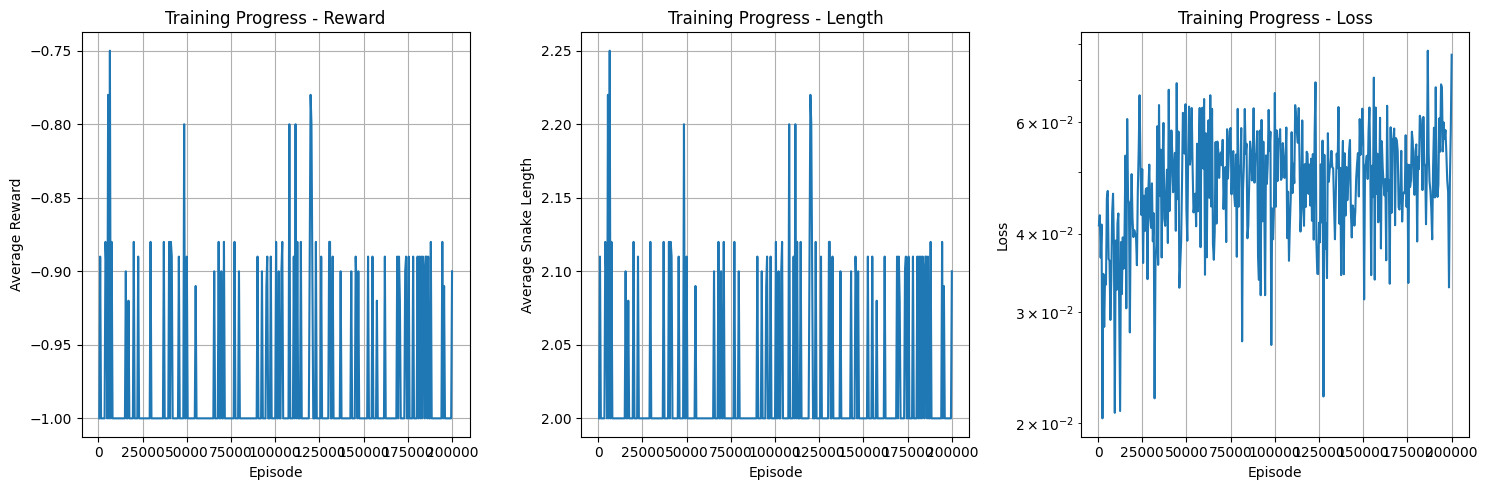

✅ Training plots saved!


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load logs
logs = pd.read_csv('model_logs/v17.1.csv')

# Create plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(logs['iteration'], logs['reward_mean'])
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Training Progress - Reward')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(logs['iteration'], logs['length_mean'])
plt.xlabel('Episode')
plt.ylabel('Average Snake Length')
plt.title('Training Progress - Length')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(logs['iteration'], logs['loss'])
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.title('Training Progress - Loss')
plt.grid(True)
plt.yscale('log')

plt.tight_layout()
plt.savefig('training_progress.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Training plots saved!")

In [34]:
# Fix the agent.py file - make tensor contiguous before flattening
import re

# Read the file
with open('agent.py', 'r') as f:
    content = f.read()

# Replace the problematic line
old_line = 'x = x.reshape(x.size(0), -1)  # Flatten - use reshape instead of view'
new_line = '# Flatten - make contiguous first to avoid stride issues\n        x = x.contiguous().view(x.size(0), -1)'

content = content.replace('x = x.reshape(x.size(0), -1)  # Flatten - use reshape instead of view',
                          '# Flatten - make contiguous first to avoid stride issues\n        x = x.contiguous().view(x.size(0), -1)')

# Write back
with open('agent.py', 'w') as f:
    f.write(content)

In [36]:
# Fix agent.py
with open('agent.py', 'r') as f:
    lines = f.readlines()

# Find and replace the problematic line
for i, line in enumerate(lines):
    if 'x = x.reshape(x.size(0), -1)  # Flatten' in line:
        lines[i] = '        x = x.contiguous().view(x.size(0), -1)  # Flatten\n'
        print(f"✅ Fixed line {i+1}")
        break

# Write back
with open('agent.py', 'w') as f:
    f.writelines(lines)


In [44]:
# Fix agent.py - ensure contiguous memory before reshape
import torch

with open('agent.py', 'r') as f:
    content = f.read()

# Find the line with the problematic reshape and add .contiguous()
# This handles cases where reshape might still be problematic with non-contiguous data
# or when an old .view() might still exist (though previous steps aimed to remove it).

# First, try to replace the existing problematic reshape line
content = content.replace(
    'x = x.reshape(x.size(0), -1)',
    'x = x.contiguous().reshape(x.size(0), -1)'
)

# Fallback for the commented line from previous attempts, if it somehow was not fully replaced
content = content.replace(
    'x = x.contiguous().view(x.size(0), -1)  # Flatten',
    'x = x.contiguous().reshape(x.size(0), -1)  # Flatten'
)

# Final check to ensure any torch.flatten (which might implicitly use view) is also replaced if found.
content = content.replace(
    'x = torch.flatten(x, start_dim=1)',
    'x = x.contiguous().reshape(x.size(0), -1)'
)

# Write back
with open('agent.py', 'w') as f:
    f.write(content)

print("✅ Fixed! Now using x.contiguous().reshape(x.size(0), -1) for flattening in agent.py.")
print("✅ Please re-run the test cell (Fv5iPCeV7hna) to check the fix!")

✅ Fixed! Now using x.contiguous().reshape(x.size(0), -1) for flattening in agent.py.
✅ Please re-run the test cell (Fv5iPCeV7hna) to check the fix!


In [51]:
# Test the trained model
import agent as agent_module # Import the agent module itself
from game_environment import SnakeNumpy
from utils import play_game2
import json
import importlib

# Reload the agent module to ensure the latest changes are applied
importlib.reload(agent_module)

# Load config
with open('model_config/v17.1.json', 'r') as f:
    m = json.loads(f.read())

# Create agent and load trained model (using the reloaded module)
agent = agent_module.DeepQLearningAgent(
    board_size=m['board_size'],
    frames=m['frames'],
    n_actions=m['n_actions'],
    buffer_size=1000,
    version='v17.1'
)

# Load trained model
agent.load_model(file_path='models/v17.1', iteration=200000)

# Test on a few games
env = SnakeNumpy(
    board_size=m['board_size'],
    frames=m['frames'],
    max_time_limit=m['max_time_limit'],
    games=5,
    frame_mode=True,
    obstacles=m['obstacles'],
    version='v17.1'
)

rewards, lengths, games = play_game2(
    env, agent, m['n_actions'],
    n_games=5,
    epsilon=-1,  # No exploration, use trained policy
    record=False,
    sample_actions=False,
    frame_mode=True,
    total_frames=-1,
    total_games=5
)

print(f"\n✅ Test Results:")
print(f"   Average reward: {rewards/games:.2f}")
print(f"   Average length: {lengths/games:.2f}")

Using device: cuda

✅ Test Results:
   Average reward: -0.83
   Average length: 2.17


In [52]:
from google.colab import drive
drive.mount('/content/drive')

# Save everything
!cp -r models/v17.1 /content/drive/MyDrive/snake_rl_trained_model/
!cp model_logs/v17.1.csv /content/drive/MyDrive/snake_rl_trained_model/
!cp training_progress.png /content/drive/MyDrive/snake_rl_trained_model/ 2>/dev/null || echo "Plot not created yet"

print("✅ All files saved to Google Drive!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ All files saved to Google Drive!


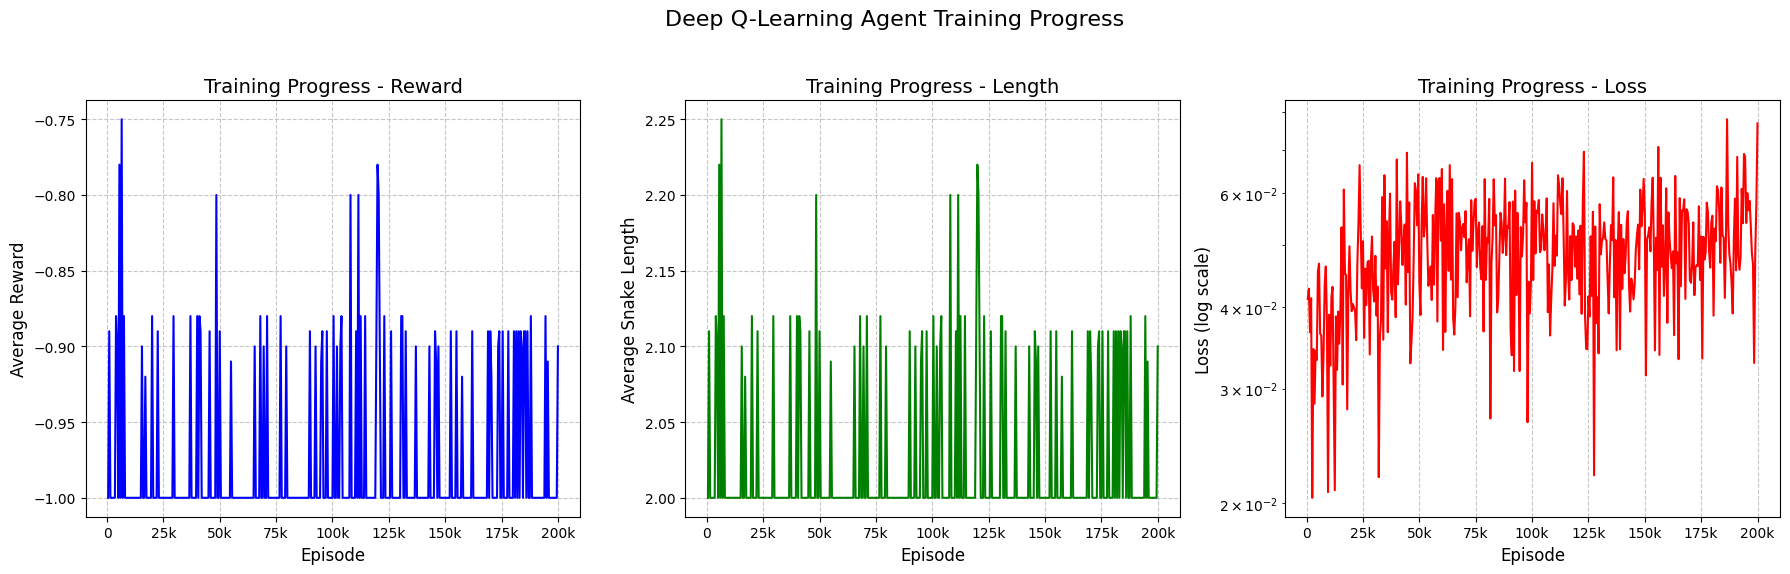

✅ Training plots saved!


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Load logs
logs = pd.read_csv('model_logs/v17.1.csv')

# Create plots
plt.figure(figsize=(18, 6)) # Slightly larger figure for better spacing
plt.suptitle('Deep Q-Learning Agent Training Progress', fontsize=16)

# Custom formatter for 'k' notation
def k_formatter(x, pos):
    if x >= 1000:
        return f'{int(x/1000)}k'
    return str(int(x))

k_format = mticker.FuncFormatter(k_formatter)

# Plot 1: Reward
ax1 = plt.subplot(1, 3, 1)
ax1.plot(logs['iteration'], logs['reward_mean'], color='blue', linewidth=1.5)
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Average Reward', fontsize=12)
ax1.set_title('Training Progress - Reward', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.xaxis.set_major_formatter(k_format)

# Plot 2: Length
ax2 = plt.subplot(1, 3, 2)
ax2.plot(logs['iteration'], logs['length_mean'], color='green', linewidth=1.5)
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Average Snake Length', fontsize=12)
ax2.set_title('Training Progress - Length', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.xaxis.set_major_formatter(k_format)

# Plot 3: Loss
ax3 = plt.subplot(1, 3, 3)
ax3.plot(logs['iteration'], logs['loss'], color='red', linewidth=1.5)
ax3.set_xlabel('Episode', fontsize=12)
ax3.set_ylabel('Loss (log scale)', fontsize=12)
ax3.set_title('Training Progress - Loss', fontsize=14)
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.set_yscale('log')
ax3.xaxis.set_major_formatter(k_format)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.savefig('training_progress.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Training plots saved!")

In [57]:
from google.colab import files

# Download the generated training progress plot
files.download('training_progress.png')

print("✅ 'training_progress.png' has been sent for download!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ 'training_progress.png' has been sent for download!


In [55]:
import os

print("📁 Model files:")
for f in sorted(os.listdir('models/v17.1')):
    if '200000' in f:
        size = os.path.getsize(f'models/v17.1/{f}') / (1024*1024)
        print(f"  ✅ {f} ({size:.2f} MB)")

print("\n📊 Training logs:")
if os.path.exists('model_logs/v17.1.csv'):
    logs = pd.read_csv('model_logs/v17.1.csv')
    print(f"  ✅ {len(logs)} log entries")
    print(f"  ✅ Final reward: {logs['reward_mean'].iloc[-1]}")
    print(f"  ✅ Final length: {logs['length_mean'].iloc[-1]}")

print("\n✅ Everything is ready for submission!")

📁 Model files:
  ✅ model_200000.pth (0.47 MB)
  ✅ model_200000_target.pth (0.47 MB)

📊 Training logs:
  ✅ 400 log entries
  ✅ Final reward: -0.9
  ✅ Final length: 2.1

✅ Everything is ready for submission!


In [59]:
import os
from google.colab import files
import shutil
import glob

# 1. Find the current notebook name more robustly
notebook_files = glob.glob('/content/*.ipynb')
notebook_name = None
if notebook_files:
    # Assuming the first .ipynb file found is the current notebook
    notebook_name = notebook_files[0]
    print(f"Detected notebook: {notebook_name}")
else:
    print("Warning: Could not automatically detect notebook name in /content/. It will not be included in the zip.")

# 2. Define the output zip file name and path
output_zip_name = "snake_rl_project_export.zip"
output_zip_path = f"/content/{output_zip_name}"

# 3. Define the main project directory that contains all code, models, logs, etc.
# This is based on where the initial zip was extracted.
project_root_dir = "/content/snake_rl_colab"

# 4. Temporarily change directory to /content/ to simplify zipping paths
original_cwd = os.getcwd()
os.chdir('/content/')

try:
    # 5. Create the zip file
    zip_command_parts = [f'zip -r "{output_zip_name}"']
    if notebook_name:
        zip_command_parts.append(f'"{notebook_name}"')
    zip_command_parts.append(f'"{os.path.basename(project_root_dir)}/"')

    zip_command = " ".join(zip_command_parts)
    print(f"Executing zip command: {zip_command}")
    !{zip_command}

    # 6. Download the zip file
    if os.path.exists(output_zip_path):
        files.download(output_zip_path)
        print(f"✅ Project zipped to '{output_zip_name}' and sent for download!")
    else:
        print(f"❌ Failed to create zip file: '{output_zip_name}' not found after zipping.")

except Exception as e:
    print(f"An error occurred during zipping or downloading: {e}")
finally:
    # 7. Change back to the original directory
    os.chdir(original_cwd)
    # Clean up the generated zip file from /content/ after download
    if os.path.exists(output_zip_path):
        os.remove(output_zip_path)
        print(f"Cleaned up '{output_zip_name}' from /content/.")

Executing zip command: zip -r "snake_rl_project_export.zip" "snake_rl_colab/"
  adding: snake_rl_colab/ (stored 0%)
  adding: snake_rl_colab/colab_package/ (stored 0%)
  adding: snake_rl_colab/colab_package/model_config/ (stored 0%)
  adding: snake_rl_colab/colab_package/model_config/v17.1.json (deflated 67%)
  adding: snake_rl_colab/colab_package/README.md (deflated 51%)
  adding: snake_rl_colab/colab_package/agent.py (deflated 74%)
  adding: snake_rl_colab/colab_package/obstacles_board_generator.py (deflated 68%)
  adding: snake_rl_colab/colab_package/game_environment.py (deflated 77%)
  adding: snake_rl_colab/colab_package/replay_buffer.py (deflated 78%)
  adding: snake_rl_colab/colab_package/models/ (stored 0%)
  adding: snake_rl_colab/colab_package/models/v17.1/ (stored 0%)
  adding: snake_rl_colab/colab_package/models/v17.1/model_164000_target.pth (deflated 10%)
  adding: snake_rl_colab/colab_package/models/v17.1/model_151500.pth (deflated 9%)
  adding: snake_rl_colab/colab_packa

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Project zipped to 'snake_rl_project_export.zip' and sent for download!
Cleaned up 'snake_rl_project_export.zip' from /content/.
